In [2]:
import numpy as np
from matplotlib import pyplot as plt
from importlib import reload as re
import sympy


z = sympy.symbols('z',complex = True)

import numba
from numba import vectorize

In [3]:
import funcLib
re(funcLib)


<module 'funcLib' from '/home/smckee/sandbox/newtonFractals/funcLib.py'>

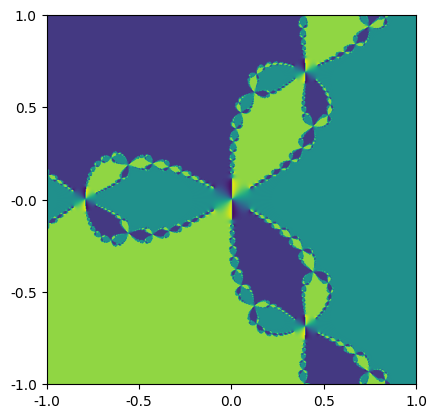

In [5]:
expr = z**3 - 1
funcLib.displayConvergence(expr,[-1,1],[-1,1],1000,1000,10)
